In [9]:
# Day 1 – Python Basics for Quants

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("AAPL.csv")

# Clean price columns (remove $ and convert to float)
price_cols = ["Close/Last", "Open", "High", "Low"]
for col in price_cols:
    df[col] = df[col].str.replace("$", "", regex=False).astype(float)

# Convert Date to datetime and set index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

df.head()


,Close/Last,Volume,Open,High,Low
Date,,,,,
2025-12-10,278.78,33038320,277.750,279.7500,276.44
2025-12-09,277.18,32193260,278.160,280.0300,276.92
2025-12-08,277.89,38211830,278.130,279.6693,276.15
2025-12-05,278.78,47265850,280.540,281.1400,278.05
2025-12-04,280.70,43989060,284.095,284.7300,278.59


In [11]:
# Calculate daily returns
df["Daily_Return"] = df["Close/Last"].pct_change()
df.head()


,Close/Last,Volume,Open,High,Low,Daily_Return
Date,,,,,,
2025-12-10,278.78,33038320,277.750,279.7500,276.44,NaN
2025-12-09,277.18,32193260,278.160,280.0300,276.92,-0.005739
2025-12-08,277.89,38211830,278.130,279.6693,276.15,0.002562
2025-12-05,278.78,47265850,280.540,281.1400,278.05,0.003203
2025-12-04,280.70,43989060,284.095,284.7300,278.59,0.006887


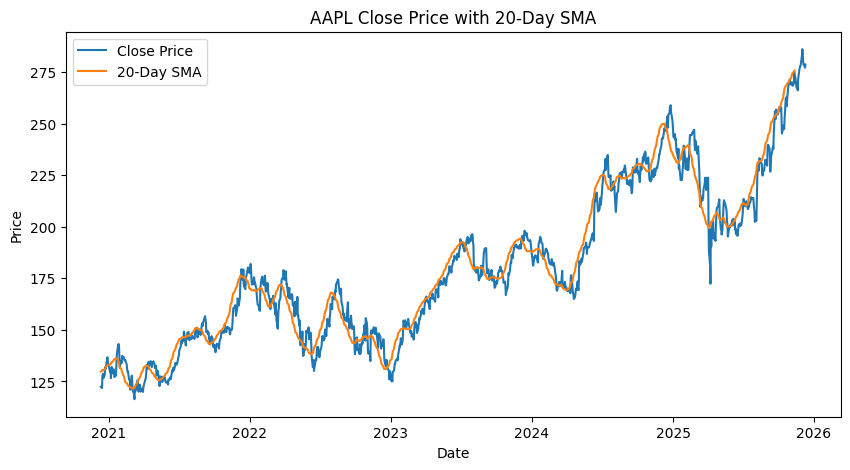

In [13]:
# 20-day Simple Moving Average
df["SMA_20"] = df["Close/Last"].rolling(20).mean()

# Plot Close Price and SMA
plt.figure(figsize=(10,5))
plt.plot(df["Close/Last"], label="Close Price")
plt.plot(df["SMA_20"], label="20-Day SMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("AAPL Close Price with 20-Day SMA")
plt.legend()
plt.show()

